# Análise do Perfil Diversidade de Funcionários da Área de TI

### Objetivo: 

- Compreender o perfil dos profissionais da área de TI. <br/>
- Avaliair inclusão de grupos minoritários em TI. <br/>
- Identificar fatores que implicam no avanço de senioridade e disparidades salariais dos profissionais de TI. 

### Fonte dos dados: 

- Usuários da plataforma de cursos digitais PrograMaria da área de TI

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel('/home/apfa/Python Aulas/progMaria/global_atz_progMaria.xlsx')

## 1. Limpeza dos dados

In [3]:
data.head(5)

,Unnamed: 0,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,PREJUDICA?,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,GESTOR?,NIVEL,NOVO NÍVEL,CARGO COMO GESTOR,CARGO ATUAL,Unnamed: 26,FAIXA SALARIAL,SALARIO,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,FALSO,NaN,True,...,False,Júnior,Júnior,NaN,DBA/Administrador de Banco de Dados,NaN,de R$ 8.001/mês a R$ 12.000/mês,11194.0,de 1 a 2 anos,de 7 a 10 anos
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",TRUE,Aprovação em processos seletivos/entrevistas,True,...,True,NaN,Gestora,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,4695.0,de 3 a 4 anos,Menos de 1 ano
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,FALSO,NaN,True,...,False,Pleno,Pleno,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,NaN,de R$ 12.001/mês a R$ 16.000/mês,14202.0,de 3 a 4 anos,Mais de 10 anos
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,FALSO,NaN,True,...,False,Sênior,Sênior,NaN,Cientista de Dados/Data Scientist,NaN,de R$ 12.001/mês a R$ 16.000/mês,15463.0,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,FALSO,NaN,True,...,False,Pleno,Pleno,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,NaN,de R$ 6.001/mês a R$ 8.000/mês,7733.0,Não tenho experiência na área de dados,Mais de 10 anos


In [4]:
data.columns

Index(['Unnamed: 0', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'PREJUDICA?',
       'ASPECTOS_PREJUDICADOS', 'VIVE_NO_BRASIL', 'ESTADO ONDE MORA',
       'UF ONDE MORA', 'REGIAO ONDE MORA', 'MUDOU DE ESTADO?',
       'REGIAO DE ORIGEM', 'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'COMPUTAÇÃO?', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'NIVEL', 'NOVO NÍVEL',
       'CARGO COMO GESTOR', 'CARGO ATUAL', 'Unnamed: 26', 'FAIXA SALARIAL',
       'SALARIO', 'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?'],
      dtype='object')

In [5]:
data.shape

(4271, 31)

In [6]:
# Renomeando coluna de Unnamed para 'ID'
data = data.rename(columns={'Unnamed: 0': 'ID'})

In [7]:
# Verifiando se há ID duplicados 
data['ID'].nunique()

4270

### 1.1. Tratando Outliers

In [8]:
# Verificando outliers para coluna de idades
data.groupby('IDADE', dropna=False)['ID'].nunique()

IDADE
18.0     13
19.0     22
20.0     33
21.0     78
22.0    108
23.0    145
24.0    196
25.0    274
26.0    281
27.0    299
28.0    291
29.0    253
30.0    248
31.0    253
32.0    225
33.0    180
34.0    189
35.0    145
36.0    154
37.0    118
38.0     78
39.0    103
40.0     67
41.0     63
42.0     54
43.0     51
44.0     42
45.0     41
46.0     31
47.0     32
48.0     21
49.0     19
50.0     34
51.0     10
52.0     20
53.0     12
54.0     13
NaN      74
Name: ID, dtype: int64

A busca mostrou NaN= 74 

Solução: 
- Definir range de idade dos usuários 
- Deterinar média de idade e substituir os valores NaN

In [9]:
data['IDADE'].isnull().value_counts()

IDADE
False    4197
True       74
Name: count, dtype: int64

In [10]:
# Além de idade os usuário indicaram uma faixa de idade
# Os valores NaN serão substiruidos pela média da faixa de idade do usuário 

data[data['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

FAIXA IDADE
55+      68
17-21     6
Name: count, dtype: int64

In [11]:
# Substituindo NaN para faixa de idade 17/21

idade_media_17_21 = data[data['FAIXA IDADE']=='17-21']['IDADE'].mean()
idade_media_17_21

np.float64(20.205479452054796)

In [12]:
# Usando .loc para substituir os valores.

data.loc[(data['FAIXA IDADE']=='17-21')&(data['IDADE'].isnull()),'IDADE'] = idade_media_17_21

In [13]:
data[data['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

FAIXA IDADE
55+    68
Name: count, dtype: int64

In [14]:
# Substituindo valores faltantes para faixa de idade 55+

mediaidade_55 = data[data['FAIXA IDADE']=='55+']['IDADE'].mean()
mediaidade_55

nan

Os usuários +55 não informaram sua idade, logo o os valores NaN serão substituidos pela média de idade de todos os usuários.

In [15]:
mediaidade = data['IDADE'].mean()
mediaidade

np.float64(31.153517220250375)

In [16]:
data.loc[(data['FAIXA IDADE']=='55+')&(data['IDADE'].isnull()),'IDADE'] = mediaidade

In [17]:
data[data['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

# Valores faltantes na coluna de idade resolvido! :) 

Series([], Name: count, dtype: int64)

Text(0.5, 0, 'Usuários da plataforma da área de TI')

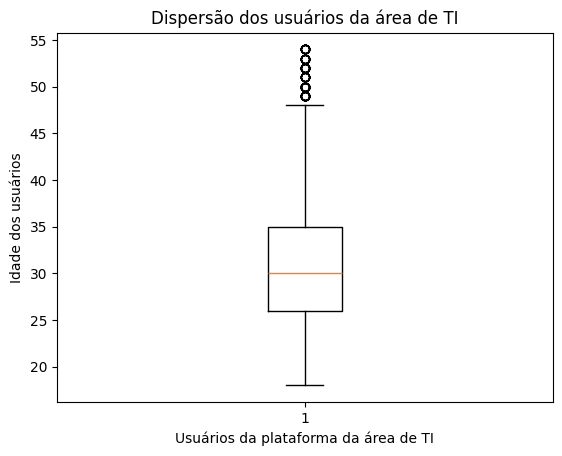

In [18]:
# dispersão da idade dos usuários 

plt.boxplot(data['IDADE'])
plt.title('Dispersão dos usuários da área de TI')
plt.ylabel('Idade dos usuários')
plt.xlabel('Usuários da plataforma da área de TI')

- Idade Média: A linha horizontal dentro da caixa representa a mediana das idades, indicando que a idade média dos usuários se concentra em torno dos 30 anos (precisamente 31,15 anos).
- A caixa representa o intervalo engloba 50% dos dados, nesse caso, os usuários têm entre 25 e 35 anos.
- Os pontos acima da linha superior da caixa são considerados outliers, ou seja, valores que se distanciam significativamente da maioria dos dados. Nesse caso, há alguns usuários com mais de 50 anos que podem ser considerados outliers.

In [19]:
# Buscando outliers na coluna de salário 

data['SALARIO'].isnull().value_counts()

SALARIO
False    3694
True      577
Name: count, dtype: int64

In [20]:
data['FAIXA SALARIAL'].isnull().value_counts()

FAIXA SALARIAL
False    3694
True      577
Name: count, dtype: int64

In [21]:
data[data['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

Series([], Name: count, dtype: int64)

Como a coluna de salário costuma ter valores muito diferentes, será usado a mediana no lugar da média. 

In [22]:
# definindo mediana
mediana_salario = data['SALARIO'].median()
data.loc[data['SALARIO'].isnull(),'SALARIO'] = mediana_salario

In [23]:
media_salario = data['SALARIO'].mean()
media_salario

np.float64(10517.53348162023)

In [24]:
salario_padrao = data['SALARIO'].std()
salario_padrao

np.float64(18096.21098911858)

In [25]:
# Primeiro quartil

q1 = data['SALARIO'].quantile(0.25)
q1

np.float64(4751.5)

In [26]:
# Terceiro quartil

q3 = data['SALARIO'].quantile(0.75)
q3

np.float64(11794.5)

In [27]:
# Diferença entre terceiro e primeiro quartil

inter_q = q3 - q1 
inter_q

np.float64(7043.0)

In [28]:
# Limite superior 

limite_superior_salario = media_salario + (3 * salario_padrao)
limite_superior_salario

np.float64(64806.166448975964)

In [29]:
# Limite inferior  

limite_inferior_salario = media_salario - (3 * salario_padrao)
limite_inferior_salario

np.float64(-43771.0994857355)

In [30]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Salário dos usuários (R$)')

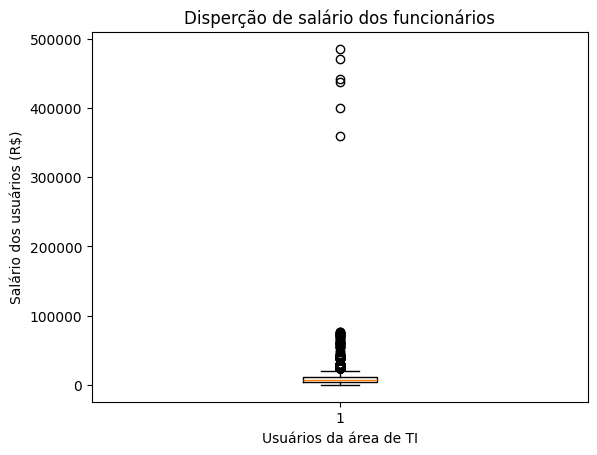

In [31]:
plt.boxplot(data['SALARIO'])
plt.title('Disperção de salário dos funcionários')
plt.xlabel('Usuários da área de TI')
plt.ylabel('Salário dos usuários (R$)')

In [32]:
# Primeira tentativa de solucionar outliers de salario
data[data['SALARIO']>limite_superior_salario]['FAIXA SALARIAL']

405               Acima de R$ 40.001/mês
443               Acima de R$ 40.001/mês
774               Acima de R$ 40.001/mês
1265              Acima de R$ 40.001/mês
2053    de R$ 30.001/mês a R$ 40.000/mês
2211              Acima de R$ 40.001/mês
2257    de R$ 30.001/mês a R$ 40.000/mês
2662              Acima de R$ 40.001/mês
2945              Acima de R$ 40.001/mês
2979              Acima de R$ 40.001/mês
3016              Acima de R$ 40.001/mês
3105              Acima de R$ 40.001/mês
3141              Acima de R$ 40.001/mês
3146              Acima de R$ 40.001/mês
3201    de R$ 30.001/mês a R$ 40.000/mês
3452              Acima de R$ 40.001/mês
3503              Acima de R$ 40.001/mês
3531              Acima de R$ 40.001/mês
3771              Acima de R$ 40.001/mês
3773              Acima de R$ 40.001/mês
3919              Acima de R$ 40.001/mês
3962              Acima de R$ 40.001/mês
Name: FAIXA SALARIAL, dtype: object

- O limite superior do salário é R$ 64806.16. 
- Se o usuário tiver uma média salarial abaixo de R$30.000 podemos considerar erro de digitação. 
- A média de salário da faixa de salário entre R$30.000 e  R$40.000 será obtida e susbtituirá esse valores.

In [33]:
mediasal_30_40 = data[(data['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês')&(data['SALARIO']<limite_superior_salario)]['SALARIO'].mean()


In [34]:

data.loc[(data['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (data['SALARIO']>limite_superior_salario),'SALARIO'] = mediasal_30_40

In [35]:
data[data['SALARIO']>limite_superior_salario]['FAIXA SALARIAL']

405     Acima de R$ 40.001/mês
443     Acima de R$ 40.001/mês
774     Acima de R$ 40.001/mês
1265    Acima de R$ 40.001/mês
2211    Acima de R$ 40.001/mês
2662    Acima de R$ 40.001/mês
2945    Acima de R$ 40.001/mês
2979    Acima de R$ 40.001/mês
3016    Acima de R$ 40.001/mês
3105    Acima de R$ 40.001/mês
3141    Acima de R$ 40.001/mês
3146    Acima de R$ 40.001/mês
3452    Acima de R$ 40.001/mês
3503    Acima de R$ 40.001/mês
3531    Acima de R$ 40.001/mês
3771    Acima de R$ 40.001/mês
3773    Acima de R$ 40.001/mês
3919    Acima de R$ 40.001/mês
3962    Acima de R$ 40.001/mês
Name: FAIXA SALARIAL, dtype: object

In [36]:
media_salario_40mais = data[(data['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (data['SALARIO']<limite_superior_salario)]['SALARIO'].mean()
media_salario_40mais

np.float64(53127.846153846156)

In [37]:
data.loc[(data['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (data['SALARIO']>limite_superior_salario), 'SALARIO'] = media_salario_40mais

In [38]:
data[data['FAIXA SALARIAL']=='Acima de R$ 40.001/mês']['SALARIO'].mean()

np.float64(53127.84615384614)

In [39]:
data[data['SALARIO']>limite_superior_salario]['FAIXA SALARIAL']


Series([], Name: FAIXA SALARIAL, dtype: object)

In [40]:
data['SALARIO'].isnull().value_counts()

SALARIO
False    4271
Name: count, dtype: int64

Text(0, 0.5, 'Salário dos usuários (R$)')

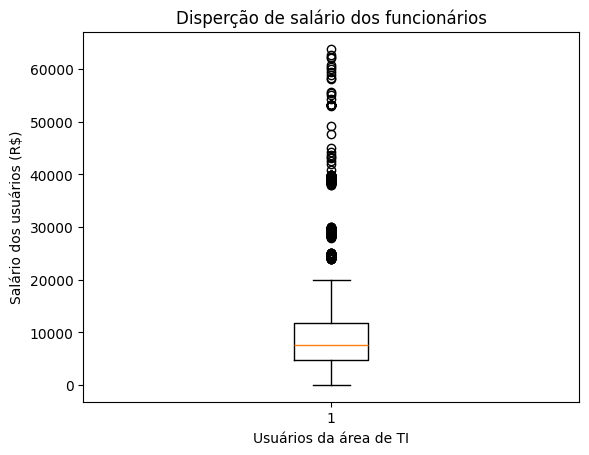

In [41]:
plt.boxplot(data['SALARIO'])
plt.title('Disperção de salário dos funcionários')
plt.xlabel('Usuários da área de TI')
plt.ylabel('Salário dos usuários (R$)')

- A média salarial do profissional de TI é R$10.517. 
- A maior parte dos funcionários possui salário entre até R$ 20.000. 
- Alguns funcionários podem receber entre R$20.000 e R$40.000 mas esses casos não são frequentes.  

Salary outliers RESOLVED! :) 

### 1.2. Featuring Engineering 

Preencher nível de cargos 

In [42]:
# Preencher nível do cargo 

def preencher_level(gestor,nível):
    if gestor == 1:
        return "Pessoa Gestora"
    else:
        return nível

In [43]:
# Aplicando a função na tabela de dados

data['NOVO NÍVEL'] = data.apply(lambda x: preencher_level(x['GESTOR?'], x['NIVEL']), axis=1)

In [44]:
# Checando se a coluna está ok? 
data['NOVO NÍVEL'].value_counts()

NOVO NÍVEL
Pleno             1060
Júnior            1023
Sênior             898
Pessoa Gestora     713
Name: count, dtype: int64

Determinando geração dos usuários 

In [45]:
def determinar_geracao(idade):
    if 39 < idade <= 58:
        return "Geração X"
    elif 29 < idade <= 39:
        return "Millenium"
    elif 13 < idade <=29:
        return "Geração Z"
    else:
        return "Outra geração"

In [46]:
# Aplicando a função e criando a coluna de geração 

data['GERAÇÃO'] = data.apply(lambda x: determinar_geracao(x['IDADE']), axis=1)

In [47]:
data['GERAÇÃO'].value_counts()

GERAÇÃO
Geração Z    1999
Millenium    1761
Geração X     511
Name: count, dtype: int64

In [48]:
data.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'PREJUDICA?',
       'ASPECTOS_PREJUDICADOS', 'VIVE_NO_BRASIL', 'ESTADO ONDE MORA',
       'UF ONDE MORA', 'REGIAO ONDE MORA', 'MUDOU DE ESTADO?',
       'REGIAO DE ORIGEM', 'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'COMPUTAÇÃO?', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'NIVEL', 'NOVO NÍVEL',
       'CARGO COMO GESTOR', 'CARGO ATUAL', 'Unnamed: 26', 'FAIXA SALARIAL',
       'SALARIO', 'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'GERAÇÃO'],
      dtype='object')

In [49]:
# Transformando variaveis categorigas em indicadores de 'sim' ou 'não'
# Ou seja, criando coluna para cada nível

# data = pd.get_dummies(data, columns=['NOVO NÍVEL'])

## 2. Perfil dos usuários 

In [50]:
data.head(5)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,PREJUDICA?,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,NIVEL,NOVO NÍVEL,CARGO COMO GESTOR,CARGO ATUAL,Unnamed: 26,FAIXA SALARIAL,SALARIO,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,GERAÇÃO
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,FALSO,NaN,True,...,Júnior,Júnior,NaN,DBA/Administrador de Banco de Dados,NaN,de R$ 8.001/mês a R$ 12.000/mês,11194.0,de 1 a 2 anos,de 7 a 10 anos,Millenium
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",TRUE,Aprovação em processos seletivos/entrevistas,True,...,NaN,Pessoa Gestora,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,4695.0,de 3 a 4 anos,Menos de 1 ano,Millenium
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,FALSO,NaN,True,...,Pleno,Pleno,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,NaN,de R$ 12.001/mês a R$ 16.000/mês,14202.0,de 3 a 4 anos,Mais de 10 anos,Geração X
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,FALSO,NaN,True,...,Sênior,Sênior,NaN,Cientista de Dados/Data Scientist,NaN,de R$ 12.001/mês a R$ 16.000/mês,15463.0,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,Geração Z
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,FALSO,NaN,True,...,Pleno,Pleno,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,NaN,de R$ 6.001/mês a R$ 8.000/mês,7733.0,Não tenho experiência na área de dados,Mais de 10 anos,Geração X


### 2.1. Distribuição de usuários por gênero

In [51]:
# Distribuição de usuários por genero
data_genero = data['GENERO'].value_counts()

In [52]:
import plotly as py
import plotly.graph_objects as go


In [53]:
# Contar os valores únicos na coluna 'GENERO'

fig = go.Figure(go.Bar(
    x=data_genero.index,  # Gêneros: Masculino, Feminino, Prefiro não informar
    y=data_genero.values,  # Contagem dos gêneros
    marker_color=['Green', 'purple', 'red']  # Cores personalizadas
))

# Adicionando títulos e rótulos
fig.update_layout(
    title='Contagem de Gêneros dos Usuários', 
    xaxis_title='Gênero',
    yaxis_title='Contagem de Usuários',
    template='plotly', title_x = 0.5,
    width=800,
    height=600
)

# Exibindo o gráfico
fig.show()

### 2.2. Perfil de idade dos usuários

In [54]:
# Perfil de idade dos usuários 

mediaidade

np.float64(31.153517220250375)

In [55]:
# Idade máxima 
max_idade = data['IDADE'].max()
max_idade

np.float64(54.0)

In [56]:
# Idade mínima 
min_idade = data['IDADE'].min()
min_idade

np.float64(18.0)

Perfil de idade por gênero 


In [57]:

idademedia_mulheres = data[data['GENERO']=='Feminino']['IDADE'].mean()
idademedia_mulheres

np.float64(31.29591437447525)

In [58]:
idademedia_homens = data[data['GENERO']=='Masculino']['IDADE'].mean()
idademedia_homens

np.float64(31.13770428039173)

In [59]:
print(f'A média de idade por gênero é bastante próxima. \n Mulheres: {idademedia_mulheres:.2f} \n Homens: {idademedia_homens:.2f} ')

A média de idade por gênero é bastante próxima. 
 Mulheres: 31.30 
 Homens: 31.14 


In [60]:

# Contagem de valores únicos na coluna 'IDADE'
data_idade = data['IDADE'].value_counts().sort_index()  # Ordenando por idade para um gráfico mais claro

# Criando o gráfico de barras
fig = go.Figure()

# Adicionando o gráfico de barras
fig.add_trace(go.Bar(
    x=data_idade.index,  # Idades
    y=data_idade.values,  # Contagem das idades
    marker_color='blue'
))

# Adicionando a linha conectando as barras (gráfico de linha)
fig.add_trace(go.Scatter(
    x=data_idade.index,  # Idades
    y=data_idade.values,  # Contagem das idades
    mode='lines+markers',  # Para incluir pontos e linhas
    line=dict(color='blue', width=3),  # Definindo a cor e espessura da linha
    marker=dict(size=6)  # Definindo o tamanho dos pontos
))

# Ajustando layout com título e rótulos
fig.update_layout(
    title='Distribuição da Idade dos Usuários', 
    xaxis_title='Idade (anos)',
    yaxis_title='Número de Usuários',
    template='plotly',
    title_x=0.5,  # Centraliza o título
    width=800,
    height=600
)

# Exibindo o gráfico
fig.show()


### 2.3. Distribuição de senioridade dos usuários 


In [61]:
# data = data.rename(columns={'Unnamed: 26': 'NOVO NÍVEL'})
data['NOVO NÍVEL'].value_counts()

NOVO NÍVEL
Pleno             1060
Júnior            1023
Sênior             898
Pessoa Gestora     713
Name: count, dtype: int64

Distribuição de senioridade por gênero 


In [62]:
cargo_genero = pd.pivot_table(data, values=['ID'], index=['GENERO'], columns=['NOVO NÍVEL'], aggfunc='count')
cargo_genero

ID                            
NOVO NÍVEL           Júnior Pessoa Gestora Pleno Sênior
GENERO                                                 
Feminino                272            132   295    187
Masculino               743            578   760    709
Prefiro não informar      4              2     4      1

In [63]:
# Distribuição do percentual de senioridade por gênero 

cargo_genero_percentual = cargo_genero.apply(lambda x: (x / x.sum()) * 100, axis=0)
cargo_genero_percentual


ID                                     
NOVO NÍVEL               Júnior Pessoa Gestora      Pleno     Sênior
GENERO                                                              
Feminino              26.692836      18.539326  27.856468  20.847269
Masculino             72.914622      81.179775  71.765817  79.041249
Prefiro não informar   0.392542       0.280899   0.377715   0.111483

In [64]:
# Senioridade Júnior - Genero masculino
junior_homens = data[(data['GENERO'] == 'Masculino') & (data['NOVO NÍVEL'] == 'Júnior')]['NOVO NÍVEL'].value_counts().values[0]
junior_mulheres =  data[(data['GENERO']=='Feminino') & (data['NOVO NÍVEL']=='Júnior')]['NOVO NÍVEL'].value_counts().values[0]
junior_genero_ninform = data[(data['GENERO']=='Prefiro não informar') & (data['NOVO NÍVEL']=='Júnior')]['NOVO NÍVEL'].value_counts().values[0]


In [65]:
# Senioridade Plenor 
plenor_homens = data[(data['GENERO']=='Masculino') & (data['NOVO NÍVEL']=='Pleno')]['NOVO NÍVEL'].value_counts().values[0]
plenor_mulheres = data[(data['GENERO']=='Feminino') & (data['NOVO NÍVEL']=='Pleno')]['NOVO NÍVEL'].value_counts().values[0]
plenor_genero_ninform = data[ (data['GENERO']=='Prefiro não informar') & (data['NOVO NÍVEL']=='Pleno')]['NOVO NÍVEL'].value_counts().values[0]


In [66]:
# Senioridade Sênior
senior_homens = data[(data['GENERO']=='Masculino') & (data['NOVO NÍVEL']=='Sênior') ]['NOVO NÍVEL'].value_counts().values[0]
senior_mulheres =data[ (data['GENERO']=='Feminino') & (data['NOVO NÍVEL']=='Sênior')]['NOVO NÍVEL'].value_counts().values[0]
senior_genero_ninform = data[ (data['GENERO']=='Prefiro não informar') & (data['NOVO NÍVEL']=='Sênior')]['NOVO NÍVEL'].value_counts().values[0]


In [67]:
# Senioridade Gestor
gestor_masculino = data[(data['GENERO']=='Masculino') & (data['NOVO NÍVEL']=='Gestora')]['NOVO NÍVEL'].value_counts()
gestor_masculino = gestor_masculino.values[0] if not gestor_masculino.empty else 0


gestor_mulheres = data[(data['GENERO']=='Feminino') & (data['NOVO NÍVEL']=='Gestora')]['NOVO NÍVEL'].value_counts()
gestor_mulheres = gestor_mulheres.values[0] if not gestor_mulheres.empty else 0


gestor_genero_ninform = data[(data['GENERO']=='Prefiro não informar') & (data['NOVO NÍVEL']=='Gestora')]['NOVO NÍVEL'].value_counts()
gestor_genero_ninform = gestor_genero_ninform.values[0] if not gestor_genero_ninform.empty else 0


In [68]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [69]:
genero = ['Feminino', 'Masculino', 'Prefiro não informar']
bar_colors = ['purple', 'green', 'red']

count_junior = [junior_mulheres, junior_homens, junior_genero_ninform]
count_plenor = [plenor_mulheres, plenor_homens, plenor_genero_ninform]
count_senior = [senior_mulheres, senior_homens, senior_genero_ninform]
count_manager = [gestor_mulheres, gestor_masculino, gestor_genero_ninform]

# Criando subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Distribuição de usuários em cargo Júnior por gênero',
    'Distribuição de usuários em cargo Plenor por gênero',
    'Distribuição de usuários em cargo Sênior por gênero',
    'Distribuição de usuários Gestores por gênero'),
    specs=[[{'type': 'domain'}, {'type': 'domain'}],  # Tipo 'domain' é para gráficos de pizza/donut
           [{'type': 'domain'}, {'type': 'domain'}]]
)

# Gráfico Donut Júnior
fig.add_trace(go.Pie(labels=genero, values=count_junior, hole=0.4, marker_colors=bar_colors, 
                     name="Cargo Júnior"), row=1, col=1)

# Gráfico Donut Plenor
fig.add_trace(go.Pie(labels=genero, values=count_plenor, hole=0.4, marker_colors=bar_colors, 
                     name="Cargo Plenor"), row=1, col=2)

# Gráfico Donut Sênior
fig.add_trace(go.Pie(labels=genero, values=count_senior, hole=0.4, marker_colors=bar_colors, 
                     name="Cargo Sênior"), row=2, col=1)

# Gráfico Donut Gestores
fig.add_trace(go.Pie(labels=genero, values=count_manager, hole=0.4, marker_colors=bar_colors, 
                     name="Gestores"), row=2, col=2)

# Ajustes de layout
fig.update_layout(
    height=600, width=1000, title_text="Distribuição de Usuários por Cargo e Gênero", title_x=0.5,
    showlegend=True  # Mostra legenda para identificar as categorias
)

# Mostrar gráfico
fig.show()


Observar a distribuição de gênero por cargos é uma maneira de não apenas mensurar o número de homens e mulheres em seus respectivos cargos, mas também compreender como fatores culturais, como a desigualdade de gênero, se refletem na área de TI e na progressão de senioridade dos indivíduos de cada gênero. 

- De forma geral, observa-se uma predominância do gênero masculino em todos os cargos. A proporção entre os gêneros varia ligeiramente entre os diferentes cargos, mas a tendência de predominância masculina se mantém.

- O gênero feminino representa uma minoria em todos os cargos, porém em cargos de maior senioridade como sênior e gestão o percentual de participação do gênero feminino é ainda menor.

- A categoria "Prefiro não informar" representa uma parcela muito pequena em todos os cargos, não acrescentando uma informações relevantes à análise.

### 2.4. Distribuição de usuários por etnia


In [70]:
data_etnia = data['COR/RACA/ETNIA'].value_counts()
data_etnia

COR/RACA/ETNIA
Branca                  2744
Parda                   1054
Preta                    291
Amarela                  128
Prefiro não informar      26
Outra                     17
Indígena                  11
Name: count, dtype: int64

In [71]:
import plotly.graph_objects as go




# Criando a figura
fig = go.Figure(go.Bar(
    x=data_etnia.values,          
    y=data_etnia.index,           
    orientation='h',              
    marker=dict(
        color=data_etnia.values,  
        colorscale='magma',      
        colorbar=dict(title='Contagem de Usuários')  
    )
))

# Adicionando títulos e rótulos
fig.update_layout(
    title='Contagem dos Usuários por Etnia', 
    xaxis_title='Contagem de Usuários',
    yaxis_title='Etnias',
    template='plotly', 
    title_x=0.5,
    width=800,
    height=600
)

# Exibindo o gráfico
fig.show()


Distribuição de cargos por etnia


In [72]:

cargo_etnia = pd.pivot_table(data, values=['ID'], index=['COR/RACA/ETNIA'], columns=['NOVO NÍVEL'], aggfunc='count')
cargo_etnia

ID                            
NOVO NÍVEL           Júnior Pessoa Gestora Pleno Sênior
COR/RACA/ETNIA                                         
Amarela                  29             28    27     27
Branca                  611            480   684    622
Indígena                  4              1     3      2
Outra                     4              5     1      3
Parda                   267            162   267    201
Prefiro não informar     10              2     9      4
Preta                    98             35    69     39

In [73]:
# percentual

cargo_etnia_percentual = cargo_etnia.apply(lambda x: (x / x.sum()) * 100, axis=0)
cargo_etnia_percentual

ID                                     
NOVO NÍVEL               Júnior Pessoa Gestora      Pleno     Sênior
COR/RACA/ETNIA                                                      
Amarela                2.834800       3.927069   2.547170   3.006682
Branca                59.726295      67.321178  64.528302  69.265033
Indígena               0.391007       0.140252   0.283019   0.222717
Outra                  0.391007       0.701262   0.094340   0.334076
Parda                 26.099707      22.720898  25.188679  22.383073
Prefiro não informar   0.977517       0.280505   0.849057   0.445434
Preta                  9.579668       4.908836   6.509434   4.342984

In [74]:
import plotly.express as px

# Dados em formato largo
dados = {
    'COR/RACA/ETNIA': ['Amarela', 'Branca', 'Indígena', 'Outra', 'Parda', 'Prefiro não informar', 'Preta'],
    'Gestora': [28, 480, 1, 5, 162, 2, 35],
    'Júnior': [29, 611, 4, 4, 267, 10, 98],
    'Pleno': [27, 684, 3, 1, 267, 9, 69],
    'Sênior': [27, 622, 2, 3, 201, 4, 39]
}

df = pd.DataFrame(dados)

ordem_etnias = ['Branca', 'Parda', 'Preta', 'Amarela', 'Indígena', 'Outra', 'Prefiro não informar']
df['COR/RACA/ETNIA'] = pd.Categorical(df['COR/RACA/ETNIA'], categories=ordem_etnias, ordered=True)

dados_longos = df.melt(id_vars='COR/RACA/ETNIA', var_name='NOVO NÍVEL', value_name='Valores')

dados_longos.sort_values(by='COR/RACA/ETNIA', inplace=True)

fig = px.bar(dados_longos, x='NOVO NÍVEL', y='Valores', color='COR/RACA/ETNIA', barmode='group')

fig.update_layout(
    title='Distribuição de Usuários por Etnia e Nível',
    xaxis_title='Nível',
    yaxis_title='Contagem de Usuários',
    title_x=0.5  # Centraliza o título
)

# Mostrando o gráfico
fig.show()



In [75]:
data.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'PREJUDICA?',
       'ASPECTOS_PREJUDICADOS', 'VIVE_NO_BRASIL', 'ESTADO ONDE MORA',
       'UF ONDE MORA', 'REGIAO ONDE MORA', 'MUDOU DE ESTADO?',
       'REGIAO DE ORIGEM', 'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'COMPUTAÇÃO?', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'NIVEL', 'NOVO NÍVEL',
       'CARGO COMO GESTOR', 'CARGO ATUAL', 'Unnamed: 26', 'FAIXA SALARIAL',
       'SALARIO', 'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'GERAÇÃO'],
      dtype='object')

Seguindo a mesma lógica da distribuição de gênero por garco, aqui análisamos a distribuição das etnias por cargo. 

- A etnia branca apresenta o maior número de usuários em todos os níveis hierárquicos, com uma diferença significativa em relação às outras etnias.
- A maioria dos usuários, independentemente da etnia, se concentra nos níveis Pleno e Júnior.
- As demais etnias (Parda, Preta, Amarela, Indígena e Outra) representam uma minoria em todos os níveis hierárquicos.
- Os dados sugerem a existência de uma desigualdade racial nos profissionais da área de TI, com menor representação de etnias não brancas em todos os níveis hierárquicos.
- A falta de diversidade étnica pode impactar a inovação, a criatividade e a tomada de decisões dentro da empresa.

Os dados fornecidos para análise são referentes ao ano de 2022. Seria interessante construir uma linha do tempo com dados de anos anteriores para comparar a participação dos diversos grupos etnicos ao longo do tempo. Se houve alguma política de inclusão, uma linha do tempo auxiliaria a acompanhar sua eficácia. 

### 2.5. Distribuição de usuários portadores de deficiência. 


In [76]:
data['PCD'].value_counts()

PCD
Não                     4198
Sim                       54
Prefiro não informar      19
Name: count, dtype: int64

In [77]:
cargo_pcd = data[(data['PCD']=='Sim') & (data['NOVO NÍVEL'])]['NOVO NÍVEL'].value_counts()
cargo_pcd

NOVO NÍVEL
Júnior            20
Sênior            13
Pleno             10
Pessoa Gestora     5
Name: count, dtype: int64

In [78]:
percetual_pcd_junior = (20/54)*100
percetual_pcd_junior


37.03703703703704

In [79]:

pcd_role_junior = np.array(data[ (data['PCD']=='Sim') & (data['NOVO NÍVEL']=='Júnior') ]['PCD'].value_counts())[0]
pcd_role_junior

np.int64(20)

In [80]:
percetual_pcd_pleno = (10/54)*100
percetual_pcd_pleno

18.51851851851852

In [81]:
pcd_role_plenor = np.array(data[ (data['PCD']=='Sim') & (data['NOVO NÍVEL']=='Pleno') ]['PCD'].value_counts())[0]
pcd_role_plenor

np.int64(10)

In [82]:
percetual_pcd_senior = (13/54)*100
percetual_pcd_senior

24.074074074074073

In [83]:
pcd_role_senior = np.array(data[ (data['PCD']=='Sim') & (data['NOVO NÍVEL']=='Sênior') ]['PCD'].value_counts())[0]
pcd_role_senior

np.int64(13)

In [84]:
percetual_pcd_gestor = (5/54)*100
percetual_pcd_gestor

9.25925925925926

In [85]:
pcd_role_manager = data[(data['PCD']=='Sim') & (data['NOVO NÍVEL']=='Gestora')]['PCD'].value_counts()
pcd_role_manager = pcd_role_manager.values[0] if not pcd_role_manager.empty else 0
pcd_role_manager


0

In [86]:
cargo_pcd = ['Júnior', 'Pleno', 'Sênior', 'Gestor']  
count_junior = [pcd_role_junior, pcd_role_plenor, pcd_role_senior, pcd_role_manager]


bar_colors = ['#cab2d6', '#b2df8a', '#fdbf6f', '#a6cee3'] 
# Criando o gráfico de barras
fig = go.Figure(go.Bar(
    x=cargo_pcd,
    y=count_junior,
    marker_color=bar_colors,  
    text=count_junior,  
    textposition='auto',  
))


fig.update_layout(
    title="Distribuição por cargo de usuários PCD",     xaxis_title="Cargos dos usuários",
    yaxis_title="Número de usuários",  
    title_x=0.5, 
    font=dict(family="Times New Roman", size=18),  
    width=800,
    height=600,
    showlegend=False 
    )

fig.show()

 A representação de pessoas com deficiência é extremamente baixa, correspondendo a apenas cerca de 1,26% do total de funcionários. Isso levanta questões sobre a eficácia das políticas de inclusão e diversidade da empresa. A organização está realmente promovendo a inclusão ou essa baixa representação reflete barreiras no processo de recrutamento e seleção?

- A decisão de 19 funcionários em não divulgar se são pessoas com deficiência (PCDs) pode sugerir um ambiente organizacional onde os indivíduos não se sentem completamente seguros ou confortáveis em se identificar como tal. Isso pode indicar que a cultura organizacional ainda não é totalmente inclusiva ou que existem preocupações sobre discriminação ou estigmatização.

- O cargo Júnior tem a maior representação de usuários com deficiência (37,03%). Isso sugere que usuários com deficiência são mais comumente encontrados em cargos de entrada.

- O cargo de Gestora tem a menor representação (9,2%). Isso indica que os usuários com deficiência estão menos representados em cargos de gestão em comparação com outros níveis hierárquicos.

- A concentração de pessoas com deficiência (PCDs) em cargos de nível inferior (Júnior) sugere potenciais desafios no avanço profissional desses funcionários. Isso pode indicar falta de oportunidades de desenvolvimento ou a presença de vieses e estigmas que dificultam a progressão na carreira de PCDs para funções com maior responsabilidade. Além disso, apenas 5 PCDs ocupam cargos de gestão, o que levanta preocupações sobre a inclusão em papéis de liderança.

# 3. Perfil salarial dos usuários 

Compreender se os fatores gênero e etnia possuem influência no salário dos usuários

### 3.1. Distribuição salarial por gênero 

In [87]:
data['NOVO NÍVEL'].value_counts()

NOVO NÍVEL
Pleno             1060
Júnior            1023
Sênior             898
Pessoa Gestora     713
Name: count, dtype: int64

In [88]:
# Média salarial dos usuários da área de TI

mediasalario_global = data['SALARIO'].mean()
mediasalario_global


np.float64(9904.390109813306)

In [89]:
# Média salarial por gênero

mediasalario_homens = (data[(data['GENERO']=='Masculino') & (data['SALARIO'])]['SALARIO'].mean())
mediasalario_homens

np.float64(10393.555983988348)

In [90]:
# Média salarial mulheres

mediasalario_mulheres = (data[(data['GENERO']=='Feminino') & (data['SALARIO'])])['SALARIO'].mean()
mediasalario_mulheres

np.float64(8482.256483100233)

In [91]:
dif_salario_genero = (mediasalario_homens - mediasalario_mulheres) 
dif_salario_genero

np.float64(1911.2995008881153)

#### Gestores

In [92]:
# Máximo, mínimo e média de salário por gênero para diferentes senioridades 
# Gestor 

# Média salarial dos gestores po gênero
mediasalario_gestor_homens = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Pessoa Gestora']['SALARIO'].mean()
mediasalario_gestora_mulheres = data[(data['GENERO']=='Feminino')&(data['NOVO NÍVEL']=='Pessoa Gestora')]['SALARIO'].mean()


/tmp/ipykernel_778/830625889.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [93]:
# Minima salarial dos gestores po gênero
minimasalario_gestor_homens = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Pessoa Gestora']['SALARIO'].min()
minimosalario_gestora_mulheres = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Pessoa Gestora']['SALARIO'].min()

/tmp/ipykernel_778/88576299.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_778/88576299.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [94]:
# Máxima salarial dos gestores po gênero

maximosalario_gestor_homens = data[(data['GENERO']=='Masculino') & (data['NOVO NÍVEL']=='Pessoa Gestora')]['SALARIO'].max()
maximosalario_gestora_mulheres = data[(data['GENERO']=='Feminino') & (data['NOVO NÍVEL']=='Pessoa Gestora')]['SALARIO'].max()


Text(0.5, 1.0, 'Distribuição do salário de gestoras mulheres')

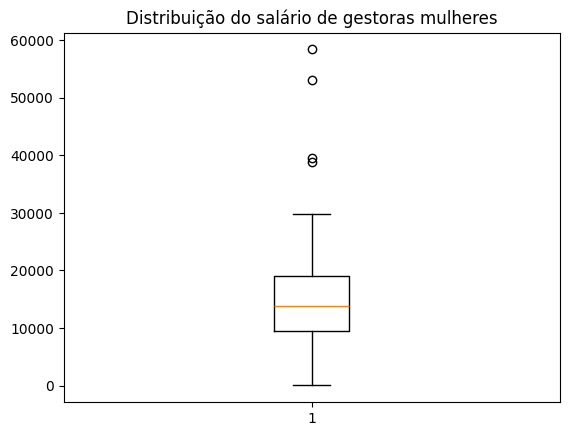

In [95]:
plt.boxplot(data[(data['GENERO']=='Feminino')&(data['NOVO NÍVEL']=='Pessoa Gestora')]['SALARIO'])
plt.title('Distribuição do salário de gestoras mulheres')

/tmp/ipykernel_778/717958370.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Distribuição do salário de gestores homens')

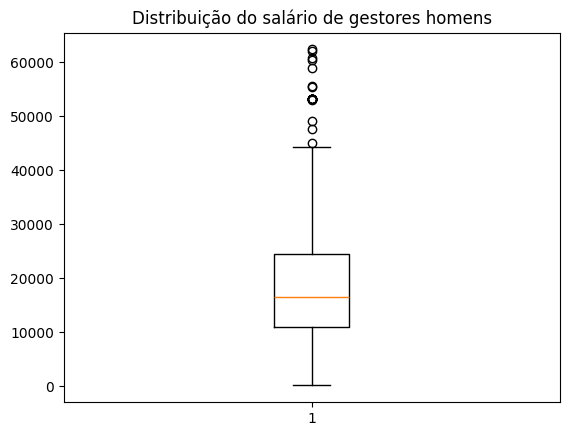

In [96]:
plt.boxplot(data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Pessoa Gestora']['SALARIO'])
plt.title('Distribuição do salário de gestores homens')

# Alguns outliers precisam ser corrigidos 

In [97]:
limite_superior_salario

np.float64(64806.166448975964)

In [98]:
# Alguns salários estão acima do limite superior R$ 64.806, mas dentro de uma faixa salarial de R$30.000 até R$40.000 
data[data['GENERO'] == 'Masculino'][data['SALARIO'] > limite_superior_salario]['FAIXA SALARIAL']


/tmp/ipykernel_778/3743749645.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Series([], Name: FAIXA SALARIAL, dtype: object)

In [99]:
# Os salario discrepantes da linha acima serão substituidos pela média dos salários da faixa salarial R$30.000 até R$40.000

data.loc[(data['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & 
         (data['GENERO'] == 'Masculino') & 
         (data['SALARIO'] > limite_superior_salario), 'SALARIO'] = mediasal_30_40

In [100]:
data[data['GENERO'] == 'Masculino'][data['SALARIO'] > limite_superior_salario]['FAIXA SALARIAL'].value_counts()
# Discrepância de salário com faixa salárial solucionada! 

/tmp/ipykernel_778/1210239406.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Series([], Name: count, dtype: int64)

/tmp/ipykernel_778/2428781076.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Distribuição do salário de gestores homens')

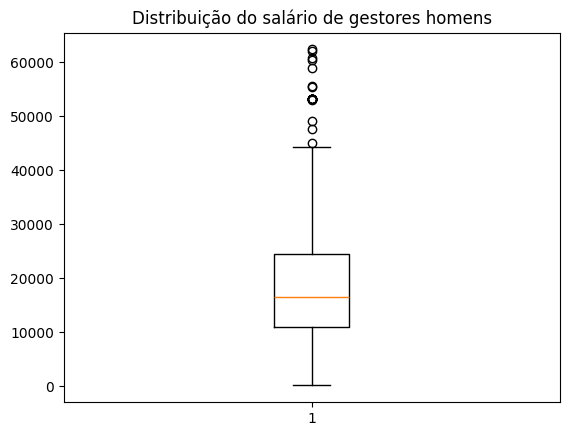

In [101]:
plt.boxplot(data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Pessoa Gestora']['SALARIO'])
plt.title('Distribuição do salário de gestores homens')

In [102]:
# Mesmo com a correção anterior ainda há um salário altamente discrepante.
# O mesmo será tratado como outlier e substituido pela média global

data['SALARIO'] = pd.to_numeric(data['SALARIO'], errors='coerce')  
max_salario = data[data['GENERO'] == 'Masculino']['SALARIO'].max()

In [103]:
data.loc[data['SALARIO'].idxmax(), 'SALARIO'] = mediasalario_global

/tmp/ipykernel_778/2182134561.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Distribuição do salário de gestores homens')

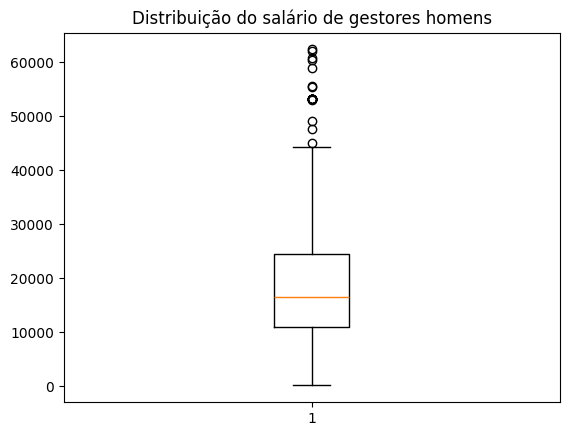

In [104]:
# Refazendo o plot para verificar se o problema foi solucionado
plt.boxplot(data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Pessoa Gestora']['SALARIO'])
plt.title('Distribuição do salário de gestores homens')

In [105]:
# Uffa! Outlier solucionado! 

Comparando os boxplots masculinos e femininos para os cargos de gestão, notamos que a média salárial é similar para os dois gêneros em torno de R$ 15.000. 
Entretanto, para o gênero masculino as ocorrências de salários acima de R$40.000 são bem mais frequêntes. 

#### Sênior

In [106]:
# Máximo, mínimo e média de salário por gênero para diferentes senioridades 
mediasalario_senior_homens = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Sênior']['SALARIO'].mean()
mediasalario_senior_mulheres = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Sênior']['SALARIO'].mean()


/tmp/ipykernel_778/2775403644.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_778/2775403644.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [107]:
#Minima salarial sênior 
minimosalarial_senior_homens = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Sênior']['SALARIO'].min()
minimosalarial_senior_mulheres = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Sênior']['SALARIO'].min()

/tmp/ipykernel_778/2005784281.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_778/2005784281.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [108]:
#Máximo salarial sênior
maximosalarial_senior_homens = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Sênior']['SALARIO'].max()
maximosalarial_senior_mulheres = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Sênior']['SALARIO'].max()

/tmp/ipykernel_778/3339259689.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_778/3339259689.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



/tmp/ipykernel_778/2717992558.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Distribuição do salário de sênior homens')

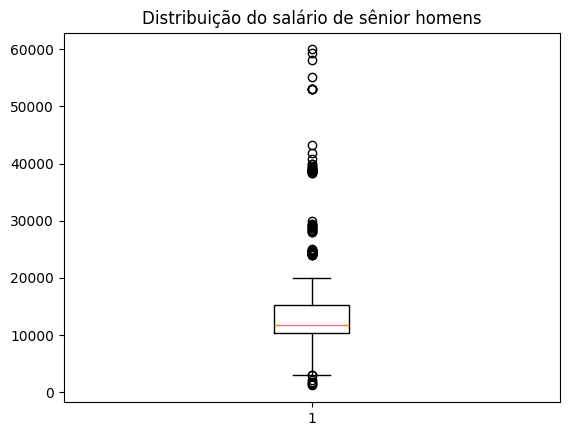

In [109]:
plt.boxplot(data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Sênior']['SALARIO'])
plt.title('Distribuição do salário de sênior homens')

In [110]:
# O salário de alguns usuários estão altamente discrepantes
# Para ter uma visão mais realista dos salário de funcionários homens em cargo sênior, vamos tratar os valores acima de R$300.000 como outliers

data.loc[(data['GENERO']=='Masculino') & (data['SALARIO']>300000),'SALARIO'] = media_salario_40mais

/tmp/ipykernel_778/3447188016.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Distribuição do salário de sênior homens')

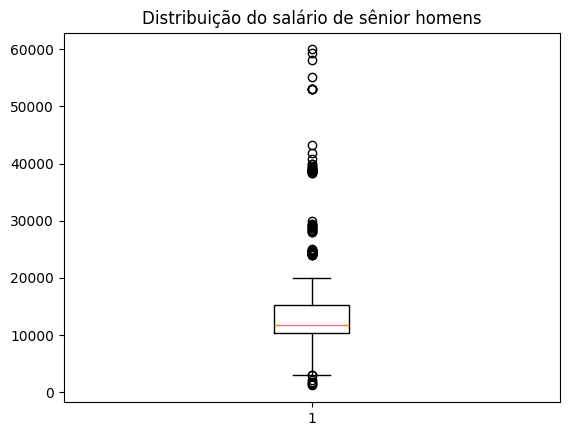

In [111]:
# Refazendo o boxplot masculino senior 
plt.boxplot(data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Sênior']['SALARIO'])
plt.title('Distribuição do salário de sênior homens')

/tmp/ipykernel_778/3259872604.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Distribuição do salário de sênior feminino')

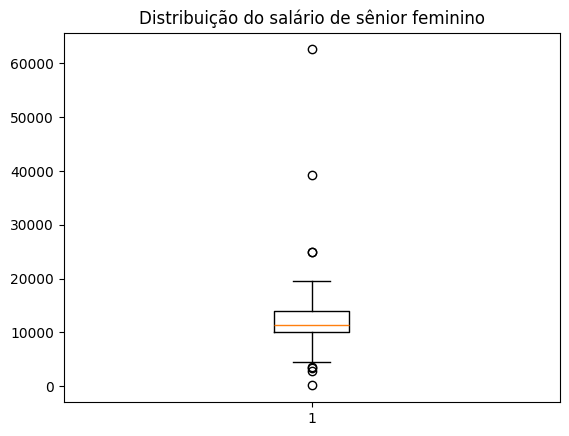

In [112]:
plt.boxplot(data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Sênior']['SALARIO'])
plt.title('Distribuição do salário de sênior feminino')


Comparando os boxplots masculinos e femininos para os cargos sênior, notamos que a média salárial é similar para os dois gêneros. 
Entretanto, para o gênero masculino as ocorrências de salários acima de R$20.000 são bem mais frequêntes. 

In [113]:

cores_p=['green','purple']
valores= [maximosalarial_senior_homens,maximosalarial_senior_mulheres]
fig = go.Figure(go.Bar(
            x=valores,
            y=['Homens', 'Mulheres'],
            orientation='h',
            marker=dict(
            color=valores,  
            colorscale=cores_p,  
            #colorbar=dict(title='Média Salarial')  # Barra de cor
            )))

fig.update_layout(
    title={
        'text': 'Máxima Salarial Sênior',
        'x': 0.5,  
        'xanchor': 'center',  
        'yanchor': 'top'
    },
    xaxis_title='Média Salarial (R$)',
    yaxis_title='Gênero',

)

fig.show()

#### Pleno

In [114]:
# Máximo, mínimo e média de salário por gênero para diferentes senioridades 

mediasalario_plenor = data[data['NOVO NÍVEL']=='Pleno']['SALARIO'].mean()
mediasalario_plenor

np.float64(8340.0706095791)

In [115]:
# Máximo salario Pleno
maximosalarial_pleno_homens = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Pleno']['SALARIO'].max()
maximosalarial_pleno_mulheres = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Pleno']['SALARIO'].max()

/tmp/ipykernel_778/612701853.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_778/612701853.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [116]:
# Minimo salário pleno
minimosalarial_pleno_homens = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Pleno']['SALARIO'].min()
minimosalarial_pleno_mulheres = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Pleno']['SALARIO'].min()

/tmp/ipykernel_778/4279889148.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_778/4279889148.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



/tmp/ipykernel_778/514586711.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Distribuição do salário de Pleno mulheres')

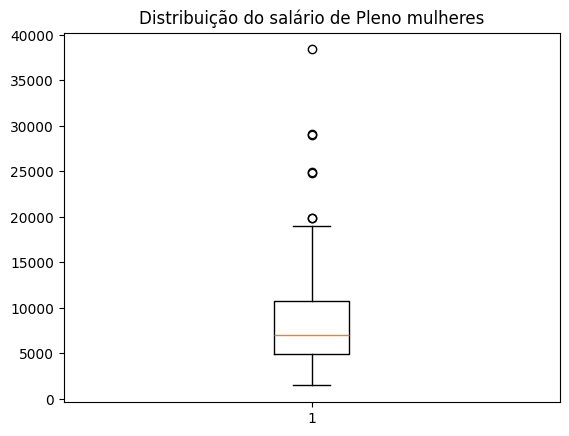

In [117]:
plt.boxplot(data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Pleno']['SALARIO'])
plt.title('Distribuição do salário de Pleno mulheres')

/tmp/ipykernel_778/100272222.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Distribuição do salário de pleno homens')

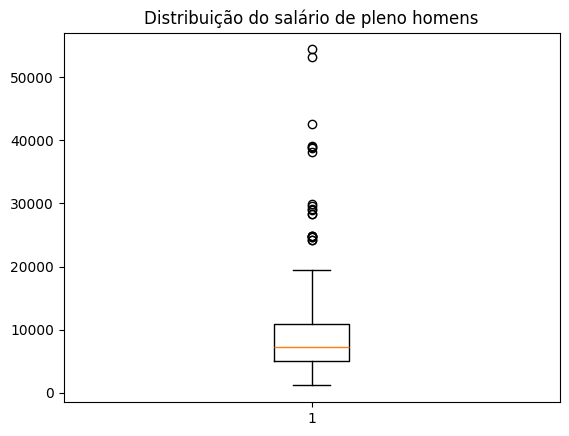

In [118]:
plt.boxplot(data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Pleno']['SALARIO'])
plt.title('Distribuição do salário de pleno homens')

As distribuições salariais por genero no cargo Pleno ainda apresentam variações entre gêneros. 
Mesmo com ambos concentrando os salários até R$20.000, o gênero masculino apresentou grande número de ocorrências acima dessa média. 

In [119]:

cores_p=['green','purple']
valores= [maximosalarial_pleno_homens,maximosalarial_pleno_mulheres]
fig = go.Figure(go.Bar(
            x=valores,
            y=['Homens', 'Mulheres'],
            orientation='h',
            marker=dict(
            color=valores,  
            colorscale=cores_p,  
            #colorbar=dict(title='Média Salarial')  # Barra de cor
            )))

fig.update_layout(
    title={
        'text': 'Máxima Salarial Pleno',
        'x': 0.5,  
        'xanchor': 'center',  
        'yanchor': 'top'
    },
    xaxis_title='Média Salarial (R$)',
    yaxis_title='Gênero',

)

fig.show()

#### Júnior

In [120]:
mediasalario_junior = data[data['NOVO NÍVEL']=='Pleno']['SALARIO'].mean()
mediasalario_junior

np.float64(8340.0706095791)

In [121]:
# máximo salarial júnior
maximosalario_junior_homens = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Júnior']['SALARIO'].max()
maximosalario_junior_mulheres = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Júnior']['SALARIO'].max()

maximosalario_junior_mulheres

/tmp/ipykernel_778/3172477964.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_778/3172477964.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



np.float64(39511.0)

In [122]:
# Minimo salarial Junior 
minimosalario_junior_homens = data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Júnior']['SALARIO'].min()
minimosalario_junior_mulheres = data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Júnior']['SALARIO'].min()

/tmp/ipykernel_778/1481389405.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_778/1481389405.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



/tmp/ipykernel_778/672767015.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Distribuição do salário de cargos júnior mulheres')

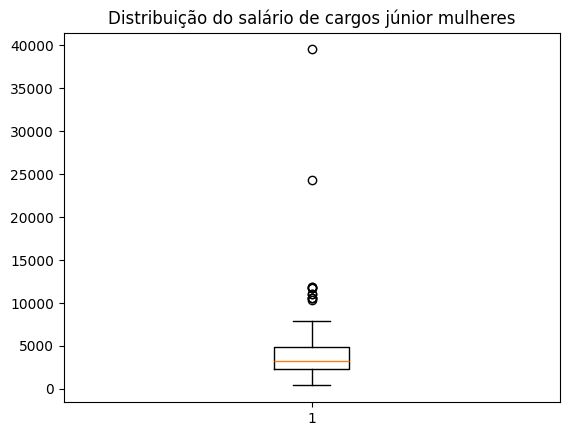

In [123]:
plt.boxplot(data[data['GENERO']=='Feminino'][data['NOVO NÍVEL']=='Júnior']['SALARIO'])
plt.title('Distribuição do salário de cargos júnior mulheres')

/tmp/ipykernel_778/3366089890.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Distribuição do salário de cargos júnior homens')

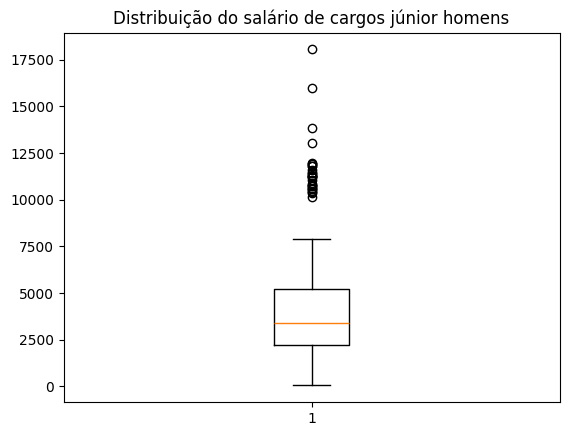

In [124]:
plt.boxplot(data[data['GENERO']=='Masculino'][data['NOVO NÍVEL']=='Júnior']['SALARIO'])
plt.title('Distribuição do salário de cargos júnior homens')

In [125]:
import plotly.graph_objects as go


In [126]:
# Gráfico para comparar médias e máximas salariais por gênero 

cores_p=['green','purple']
valores= [maximosalario_junior_homens,maximosalario_junior_mulheres]
fig = go.Figure(go.Bar(
            x=valores,
            y=['Homens', 'Mulheres'],
            orientation='h',
            marker=dict(
            color=valores,  
            colorscale=cores_p,  
            #colorbar=dict(title='Média Salarial')  # Barra de cor
            )))

fig.update_layout(
    title={
        'text': 'Máxima Salarial Júnior',
        'x': 0.5,  
        'xanchor': 'center',  
        'yanchor': 'top'
    },
    xaxis_title='Média Salarial (R$)',
    yaxis_title='Gênero',

)

fig.show()

### 3.2. Distribuição salarial por etnia 

In [127]:
# Médias salariais para diferentes etnias 

In [128]:
mediasalario_brancos = data[data['COR/RACA/ETNIA']=='Branca']['SALARIO'].mean() # Média salarial pessoas brancas 
mediasalario_pardos = data[data['COR/RACA/ETNIA']=='Parda']['SALARIO'].mean() # Média salarial pessoas pardas 
mediasalario_pardos = data[data['COR/RACA/ETNIA']=='Parda']['SALARIO'].mean() # Média salarial pessoas pardas 
mediasalario_pretas = data[data['COR/RACA/ETNIA']=='Preta']['SALARIO'].mean() # Média salarial pessoas pretas 
mediasalario_amarelas = data[data['COR/RACA/ETNIA']=='Amarela']['SALARIO'].mean() # Média salarial pessoas amarelas 
mediasalario_indigenas = data[data['COR/RACA/ETNIA']=='Indígena']['SALARIO'].mean() # Médias salarial pessoas indígenas 
mediasalario_outros = data[data['COR/RACA/ETNIA']=='Outra']['SALARIO'].mean() # Média salarial outras etnias 

In [129]:
print(f'Médias salariais: \n Brancos: R${mediasalario_brancos:.2f} \n Pardas: R${mediasalario_pardos:.2f} \n Pretas: R${mediasalario_pretas:.2f} \n Amarelas: R${mediasalario_amarelas:.2f} \n Indígenas: R${mediasalario_indigenas:.2f}  \n Outros: R${mediasalario_outros:.2f}')

Médias salariais: 
 Brancos: R$10425.18 
 Pardas: R$8764.81 
 Pretas: R$7702.33 
 Amarelas: R$12457.54 
 Indígenas: R$10886.05  
 Outros: R$14918.11


In [130]:
# Salario máximo por etnia 

In [131]:
maximosalario_brancos = data[data['COR/RACA/ETNIA']=='Branca']['SALARIO'].max() # Máximo salarial pessoas brancas 
maximosalario_pardos = data[data['COR/RACA/ETNIA']=='Parda']['SALARIO'].max() # Máximo salarial pessoas pardas 
maximosalario_pardos = data[data['COR/RACA/ETNIA']=='Parda']['SALARIO'].max() # Máximo salarial pessoas pardas 
maximosalario_pretas = data[data['COR/RACA/ETNIA']=='Preta']['SALARIO'].max() # Máximo salarial pessoas pretas 
maximosalario_amarelas = data[data['COR/RACA/ETNIA']=='Amarela']['SALARIO'].max() # Máximo salarial pessoas amarelas 
maximosalario_indigenas = data[data['COR/RACA/ETNIA']=='Indígena']['SALARIO'].max() # Máximo salarial pessoas indígenas 
maximosalario_outros = data[data['COR/RACA/ETNIA']=='Outra']['SALARIO'].max() # Máximo salarial outras etnias 

In [132]:
print(f'Máximo salariais: \n Brancos: R${maximosalario_brancos:.2f} \n Pardas: R${maximosalario_pardos:.2f} \n Pretas: R${maximosalario_pretas:.2f} \n Amarelas: R${maximosalario_amarelas:.2f} \n Indígenas: R${maximosalario_indigenas:.2f}  \n Outros: R${maximosalario_outros:.2f}')

Máximo salariais: 
 Brancos: R$62577.00 
 Pardas: R$59982.00 
 Pretas: R$45045.00 
 Amarelas: R$62001.00 
 Indígenas: R$38087.00  
 Outros: R$53127.85


In [133]:
# Mínimo salarial 

minimosalario_brancos = data[data['COR/RACA/ETNIA']=='Branca']['SALARIO'].min() # Minimo salarial pessoas brancas 
minimosalario_pardos = data[data['COR/RACA/ETNIA']=='Parda']['SALARIO'].min() # Minimo salarial pessoas pardas 
minimoosalario_pardos = data[data['COR/RACA/ETNIA']=='Parda']['SALARIO'].min() # Minimo salarial pessoas pardas 
minimosalario_pretas = data[data['COR/RACA/ETNIA']=='Preta']['SALARIO'].min() # Minimo salarial pessoas pretas 
minimosalario_amarelas = data[data['COR/RACA/ETNIA']=='Amarela']['SALARIO'].min() # Minimo salarial pessoas amarelas 
minimosalario_indigenas = data[data['COR/RACA/ETNIA']=='Indígena']['SALARIO'].min() # Minimo salarial pessoas indígenas 
minimosalario_outros = data[data['COR/RACA/ETNIA']=='Outra']['SALARIO'].min() # Minimo salarial outras etnias 

In [134]:
print(f'Minimo salariais: \n Brancos: R${minimosalario_brancos:.2f} \n Pardas: R${minimosalario_pardos:.2f} \n Pretas: R${minimosalario_pretas:.2f} \n Amarelas: R${minimosalario_amarelas:.2f} \n Indígenas: R${minimosalario_indigenas:.2f}  \n Outros: R${minimosalario_outros:.2f}')

Minimo salariais: 
 Brancos: R$51.00 
 Pardas: R$175.00 
 Pretas: R$766.00 
 Amarelas: R$35.00 
 Indígenas: R$826.00  
 Outros: R$3225.00


In [135]:
import plotly.graph_objects as go

valores= [mediasalario_brancos, mediasalario_pardos, mediasalario_pretas, mediasalario_amarelas, mediasalario_indigenas, mediasalario_outros]
fig = go.Figure(go.Bar(
            x=valores,
            y=['Outros', 'Indígenas', 'Amarelas', 'Pretas', 'Pardas', 'Brancas'],
            orientation='h',
            marker=dict(
            color=valores,  
            colorscale='sunset',  
            #colorbar=dict(title='Média Salarial')  # Barra de cor
            )))

fig.update_layout(
    title={
        'text': 'Média Salarial por Etnia',
        'x': 0.5,  
        'xanchor': 'center',  
        'yanchor': 'top'
    },
    xaxis_title='Média Salarial (R$)',
    yaxis_title='Etnia',

)

fig.show()

In [136]:
# Máximas salariais por etnia 
import plotly.graph_objects as go

valores= [maximosalario_outros, maximosalario_indigenas, maximosalario_amarelas, maximosalario_pretas, maximosalario_pardos, maximosalario_brancos]

fig = go.Figure(go.Bar(
            x=valores,
            y=['Outros', 'Indígenas', 'Amarelas', 'Pretas', 'Pardas', 'Brancas'],
            orientation='h',
            marker=dict(
            color=valores,  
            colorscale='sunset',  
            #colorbar=dict(title='Média Salarial')  # Barra de cor
            )))

fig.update_layout(
    title={
        'text': 'Máximo Salarial por Etnia',
        'x': 0.5,  
        'xanchor': 'center',  
        'yanchor': 'top'
    },
    xaxis_title='Média Salarial (R$)',
    yaxis_title='Etnia',

)

fig.show()

#### Nível de confiança dos salários 

In [137]:
# Nível de confiança de 95%
conf_nivel = 0.95

In [138]:
salario = data['SALARIO']

# Média amostral do salário 
mediaamostral_salario = np.mean(salario)
mediaamostral_salario

np.float64(9891.76809860043)

In [139]:
# Desvio padrão do salário
desviopadrao_salario = np.std(salario)
desviopadrao_salario

np.float64(8265.033802750899)

In [140]:
comprimento_salario = len(salario)
comprimento_salario

4271

In [141]:
from scipy import stats

In [142]:
# Erro padrão 
erropadrao_salario = stats.sem(salario)
erropadrao_salario

np.float64(126.482574412923)

In [143]:
# Nível de confiança 
stats.t.interval(conf_nivel,comprimento_salario - 1,mediaamostral_salario,scale=erropadrao_salario)

(np.float64(9643.796518946647), np.float64(10139.739678254215))

Vamos usar um nível de confiança de 90% para determinar o range de salários por gênero 

In [144]:
level_conf = 0.90

In [145]:
# média amostral salario por gênero

salario_homens = (data[(data['GENERO']=='Masculino') & (data['SALARIO'])]['SALARIO'])
mediaamostral_salario_homens = np.mean(salario_homens)

salario_mulheres = (data[(data['GENERO']=='Feminino') & (data['SALARIO'])]['SALARIO'])
mediaamostral_salario_mulheres = np.mean(salario_mulheres)


print(f'Média amostral salários: \n homens R${mediaamostral_salario_homens:.2f} \n mulheres R${mediaamostral_salario_mulheres:.2f}')

Média amostral salários: 
 homens R$10376.68 
 mulheres R$8482.26


In [146]:
# Desvio padrão salario por gênero 

desviopadrao_salario_homens = np.std(salario_homens)
desviopadrao_salario_mulheres = np.std(salario_mulheres)

print(f'Desvio padrão salário: \n Homens R${desviopadrao_salario_homens:.2f} \n Mulheres R${desviopadrao_salario_mulheres:.2f}')


Desvio padrão salário: 
 Homens R$8800.55 
 Mulheres R$6219.18


In [147]:
comprimento_salario_homens = len(salario_homens)
comprimento_salario_mulheres = len(salario_mulheres)

In [148]:
# Erro padrão dos salários por gênero 
erropadrao_salario_homens = stats.sem(salario_homens)
erropadrao_salario_mulheres = stats.sem(salario_mulheres)

In [149]:
# Nível de confiança dos salários 
nivelconfianca_salario_homens = stats.t.interval(conf_nivel,comprimento_salario_homens - 1,mediaamostral_salario_homens,scale=erropadrao_salario_homens)
nivelconfiança_salario_mulheres = stats.t.interval(conf_nivel,comprimento_salario_mulheres - 1,mediaamostral_salario_mulheres, scale= erropadrao_salario_mulheres)


In [150]:
print(f'Com 90% de confiança o salário médio por gênero é: \n Homens {nivelconfianca_salario_homens} \n Mulheres {nivelconfianca_salario_homens}.')

Com 90% de confiança o salário médio por gênero é: 
 Homens (np.float64(10071.310158346858), np.float64(10682.045635622204)) 
 Mulheres (np.float64(10071.310158346858), np.float64(10682.045635622204)).


#### Aplicação da correlação de Pearson para idades e salários 

In [151]:
# Using pandas and Pearson correlation 

correlacaop_salario = data['IDADE'].corr(data['SALARIO'])
print(f'A correlação entre idade e salário é de  {correlacaop_salario:.4f}. \n Mostrando que a idade não é um fator significativo para o crescimento do salário.')

A correlação entre idade e salário é de  0.2909. 
 Mostrando que a idade não é um fator significativo para o crescimento do salário.


In [152]:
from scipy.stats import chi2_contingency

#### Coeficiente de Cramer para compreender cresciemento do salário 

In [153]:

def cramer_coef(column1, column2):
    tabela_cruzada = np.array(pd.crosstab(column1,column2))
    chi2 = chi2_contingency(tabela_cruzada)[0]
    soma_tabela_cruzada = np.sum(tabela_cruzada)
    mini_tabela_cruzada = min(tabela_cruzada.shape)-1
    cramer = np.sqrt(chi2/(soma_tabela_cruzada*mini_tabela_cruzada))
    return cramer

In [154]:
cramer_ensino_etnia = cramer_coef(data['NIVEL DE ENSINO'], data['COR/RACA/ETNIA'])

In [155]:
print(f'A baixa correlação apresentada pelo coeficiente de Cramer {cramer_ensino_etnia:.4f} leva a entender que não há relação entre etnia e nível de ensino.\n Entretanto na sociedade esses são fatores fortemente correlacionados. \nSerá que essa baixa correlação de cramer se deve ao fato que a área de TI já é uma área que já exige formação para atuar?')

A baixa correlação apresentada pelo coeficiente de Cramer 0.0450 leva a entender que não há relação entre etnia e nível de ensino.
 Entretanto na sociedade esses são fatores fortemente correlacionados. 
Será que essa baixa correlação de cramer se deve ao fato que a área de TI já é uma área que já exige formação para atuar?


In [156]:
cramer_salario_regiaomora = cramer_coef(data['SALARIO'], data['REGIAO ONDE MORA'])
cramer_salario_estado = cramer_coef(data['SALARIO'], data['ESTADO ONDE MORA'])
cramer_salario_mudancaestado = cramer_coef(data['SALARIO'], data['MUDOU DE ESTADO?'])




In [157]:
cramer_salario_nivelensino = cramer_coef(data['SALARIO'], data['NIVEL DE ENSINO'])
cramer_salario_areaform = cramer_coef(data['SALARIO'],data['ÁREA DE FORMAÇÃO'])
cramer_salario_computacao = cramer_coef(data['SALARIO'], data['COMPUTAÇÃO?'])

print(f'Área e nível de estudo também são fatores que se mostraram fortemente correlacionados e significativos para os salários dos funcionários. \n A correlação entre salário e nível de ensino ({cramer_salario_nivelensino:.4f}), salário e área de formação ({cramer_salario_areaform:.4f}) e salário e formação na área de computação ({cramer_salario_computacao:.4f}), também é bastante significativa. O que demonstra o peso da formação profissional na área de TI.')

Área e nível de estudo também são fatores que se mostraram fortemente correlacionados e significativos para os salários dos funcionários. 
 A correlação entre salário e nível de ensino (0.8402), salário e área de formação (0.8596) e salário e formação na área de computação (0.8852), também é bastante significativa. O que demonstra o peso da formação profissional na área de TI.


In [158]:
cramer_salario_experiencia = cramer_coef(data['SALARIO'], data['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'])
cramer_salario_nfuncionarios = cramer_coef(data['SALARIO'], data['NUMERO DE FUNCIONARIOS'])
cramer_salario_setor = cramer_coef(data['SALARIO'], data['SETOR'])

print(f'Entretanto, alguns fatores apresentaram uma correlção maior que 94%. \n São eles salário e tempo de experiência ({cramer_salario_experiencia:.4f}), setor ({cramer_salario_setor:.4f}) e número de funcionários ({cramer_salario_nfuncionarios:.4f}). \n Indicando que o tempo de experiência na área é um fator valorizado dentro da área de TI e, essa valorização, gera implicação direta em maiores salários. \n Assim como a escolha do setor onde irá trabalhar e a escolha por empresas de grande porte. ')


Entretanto, alguns fatores apresentaram uma correlção maior que 94%. 
 São eles salário e tempo de experiência (0.9516), setor (0.9467) e número de funcionários (0.9478). 
 Indicando que o tempo de experiência na área é um fator valorizado dentro da área de TI e, essa valorização, gera implicação direta em maiores salários. 
 Assim como a escolha do setor onde irá trabalhar e a escolha por empresas de grande porte. 


In [159]:
table_cross = pd.crosstab(data['NIVEL DE ENSINO'], data['COR/RACA/ETNIA'])
table_cross

COR/RACA/ETNIA,Amarela,Branca,Indígena,Outra,Parda,Prefiro não informar,Preta
NIVEL DE ENSINO,,,,,,,
Doutorado ou Phd,7,127,0,0,50,1,6
Estudante de Graduação,15,365,2,0,178,2,51
Graduação/Bacharelado,50,999,4,6,333,14,104
Mestrado,14,355,2,3,113,1,33
Não tenho graduação formal,2,65,0,1,33,0,9
Prefiro não informar,0,8,0,0,3,1,0
Pós-graduação,40,825,3,7,344,7,88


### 3.3. Satisfação e abertura dos usuários para mudança de emprego  

In [160]:
data_two = pd.read_excel('/home/apfa/Python Aulas/progMaria/dados_dois_progrmaria.xlsx')

In [161]:
data_two.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,"('P4_a_1 ', 'Atuacao')",Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [162]:
# Connect both tables using the ID column
# Now we have a new 'data'
data = data.rename(columns={'Unnamed: 0': 'ID'})
data = data.merge(data_two, on='ID', how='left')



In [163]:
data['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

Você pretende mudar de emprego nos próximos 6 meses?
Não estou buscando, mas me considero aberto a outras oportunidades         1354
Estou em busca de oportunidades dentro ou fora do Brasil                   1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses     978
Estou em busca de oportunidades, mas apenas fora do Brasil                  353
Name: count, dtype: int64

In [164]:
# Creating new columns 
# Using 'contens' to search specific words

data['EM BUSCA'] = data['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)


In [165]:
data['EM BUSCA'].value_counts()

EM BUSCA
False    2332
True     1364
Name: count, dtype: int64

In [166]:
data['NÃO MUDAR'] = data['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('Não', case=False)


In [167]:
data['ABERTO A OPORTUNIDADES'] = data['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)

In [168]:
data['ABERTO A OPORTUNIDADES'].value_counts()

ABERTO A OPORTUNIDADES
False    2342
True     1354
Name: count, dtype: int64

A quantidade de usuários que se demonstraram abertos a novas oportunidades é altamente similar a quantidade de usuários em busca de empregos. 
Mostrando que, os usuários que já estão empregados, demonstram estarem satisfeitos com seu emprego. 

#### 3.4. Linguagens de programação usadas pelos usuários

In [169]:
data['Quais das linguagens listadas abaixo você utiliza no trabalho?'].value_counts()

Quais das linguagens listadas abaixo você utiliza no trabalho?
SQL, Python                                             749
0                                                       590
SQL                                                     329
Não utilizo nenhuma das linguagens listadas             301
Python, SQL                                             141
                                                       ... 
SQL, .NET, Visual Basic/VBA, JavaScript, PHP, Python      1
SQL, Python, Java, C/C++/C#                               1
.NET                                                      1
SQL, Python, SAS/Stata, Visual Basic/VBA, R               1
SQL, PHP, JavaScript                                      1
Name: count, Length: 208, dtype: int64

In [170]:
# Criando uma coluna para usuários que usam python
data['PYTHON'] = data['Quais das linguagens listadas abaixo você utiliza no trabalho?'].str.contains('Python', case=False)
data['PYTHON'].value_counts()
linguagem_python = data['PYTHON'].sum()


In [171]:
# Criando uma coluna para usuários que usam SQL
data['SQL'] = data['Quais das linguagens listadas abaixo você utiliza no trabalho?'].str.contains('SQL', case=False)
data['SQL'].value_counts()
linguagem_sql = data['SQL'].sum()


In [172]:
# Criando uma coluna para usuários que usam Java
data['JavaScript'] = data['Quais das linguagens listadas abaixo você utiliza no trabalho?'].str.contains('JavaScript', case=False, na=False)
data['JavaScript'].value_counts()
linguagem_javascript = data['JavaScript'].sum()



In [173]:
# Criando uma coluna para usuários que usam C/C#/C++
data['C/C#/C++'] = data['Quais das linguagens listadas abaixo você utiliza no trabalho?'].str.contains('C/C++/C#', case=False, na=False)
data['C/C#/C++'].value_counts()
linguagem_C = data['C/C#/C++'].sum()


In [174]:
# Criando uma coluna para usuários que usam PHP
data['PHP'] = data['Quais das linguagens listadas abaixo você utiliza no trabalho?'].str.contains('PHP', case=False, na=False)
data['PHP'].value_counts()
linguagem_php = data['PHP'].sum()

In [175]:
# Criando uma coluna para usuários que usam .NET
data['.NET'] = data['Quais das linguagens listadas abaixo você utiliza no trabalho?'].str.contains('.NET', case=False, na=False)
data['.NET'].value_counts()
linguagem_net = data['.NET'].sum()


In [176]:
linguagem_nome = ['Python', 'SQL', 'JavaScript','PHP','.NET', 'C#/C+/C++']  
linguagens = [linguagem_python, linguagem_sql, linguagem_javascript, linguagem_php, linguagem_net, linguagem_C]


bar_colors = ['#cab2d6', '#b2df8a', '#fdbf6f', '#a6cee3', '#ff7f00', '#33a02c'] 
# Criando o gráfico de barras
fig = go.Figure(go.Bar(
    x=linguagem_nome,
    y=linguagens,
    marker_color=bar_colors,  
    text=linguagens,  
    textposition='auto',  
))


fig.update_layout(
    title="Linguagens de programação utilizadas pelos usuários",     xaxis_title="Linguagens de programação",
    yaxis_title="Número de usuários",  
    title_x=0.5, 
    font=dict(family="Times New Roman", size=18),  
    width=800,
    height=600,
    showlegend=False 
    )

fig.show()

# Conclusões

#### Satisfação com o emprego



#### Uso da correlação de cramer para indicar o percentual de influência de diversas áreas nos salários dos usuários. 

- A baixa correlação apresentada pelo coeficiente de Cramer (4,5%) leva a entender que não há relação entre etnia e nível de ensino.
 Entretanto na sociedade esses são fatores fortemente correlacionados. 
Será que essa baixa correlação de cramer se deve ao fato que a área de TI já é uma área que já exige formação para atuar?

- A alta correlação de cramer para salário e região onde moram (86,76%) assim como salário e estado onde mora (84,78%), mostram que sim, a localidade dos usuário é um fator determinante para seus salários. 
 Essa constatação levou a outra, a correlação de cramer entre salário e mudança de estado (88,66%), mostrando que, o fator geografico se demonstrou significativo o suficiente para que os usuário optasse por mudar de estado.

 - Área e nível de estudo também são fatores que se mostraram fortemente correlacionados e significativos para os salários dos funcionários. 
 A correlação entre salário e nível de ensino (84,02%), salário e área de formação (85,96%) e salário e formação na área de computação (88,52%), também é bastante significativa. O que demonstra o peso da formação profissional na área de TI.

 - Entretanto, alguns fatores apresentaram uma correlção maior que 94%. 
 São eles salário e tempo de experiência (95,16%), setor (94,67%) e número de funcionários (94,78%). 
 Indicando que o tempo de experiência na área é um fator valorizado dentro da área de TI e, essa valorização, gera implicação direta em maiores salários. 
 Assim como a escolha do setor onde irá trabalhar e a escolha por empresas de grande porte. 

